<a href="https://colab.research.google.com/github/Sanzida-Afrin-Promi/ML_Assignment/blob/main/FinalAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
train_path = '/content/drive/MyDrive/Dummy-Dataset/train'
validation_path = '/content/drive/MyDrive/Dummy-Dataset/val'
test_path = '/content/drive/MyDrive/Dummy-Dataset/test'


In [22]:
img_size = (150, 150)
input_shape = (img_size[0], img_size[1], 3)


In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size=img_size,
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [26]:
batch_size = 10

total_train_samples =  train_generator.samples
steps_per_epoch = max(1, total_train_samples // batch_size)
print("Current steps_per_epoch:", steps_per_epoch)

model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    steps_per_epoch=steps_per_epoch,
    verbose=1
)



Current steps_per_epoch: 521
Epoch 1/5
163/521 [========>.....................] - ETA: 44:06 - loss: 0.3458 - accuracy: 0.8641

521/521 [==============================] - 1254s 2s/step - loss: 0.3458 - accuracy: 0.8641 - val_loss: 0.4382 - val_accuracy: 0.8125


In [27]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples)
print(f'Test Accuracy: {test_acc}')

624/624 [==============================] - 182s 291ms/step - loss: 0.4665 - accuracy: 0.8381
Test Accuracy: 0.8381410241127014


In [28]:
predictions = model.predict(test_generator, steps=test_generator.samples)

624/624 [==============================] - 10s 16ms/step


In [29]:
print(f'Prediction for the first image: {predictions[0]}')

Prediction for the first image: [0.09958581]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


In [33]:
img_path = '/content/drive/MyDrive/Dummy-Dataset/test/PNEUMONIA/person100_bacteria_475.jpeg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [34]:
prediction = model.predict(img_array)


1/1 [==============================] - 0s 81ms/step


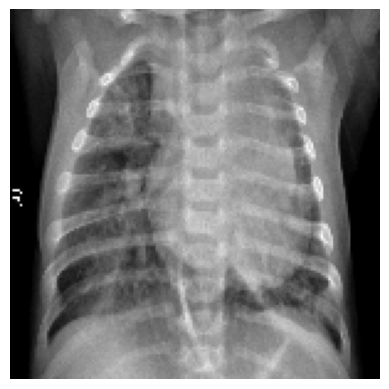

In [35]:
plt.imshow(img)
plt.axis('off')
plt.show()


In [36]:
if prediction[0] > 0.5:
    print("Prediction: Pneumonia")
else:
    print("Prediction: Normal")


Prediction: Pneumonia


In [44]:
import os

In [45]:
normal_images = [os.path.join(normal_folder_path, img) for img in os.listdir(normal_folder_path)[:20]]

1/1 [==============================] - 0s 25ms/step


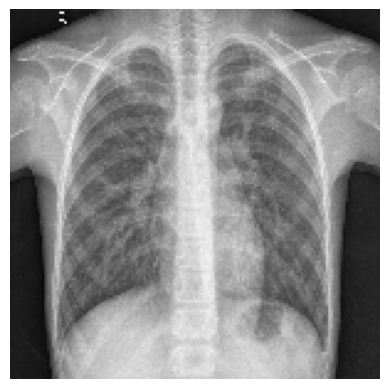

Prediction: Pneumonia (Confidence: 0.62)
1/1 [==============================] - 0s 26ms/step


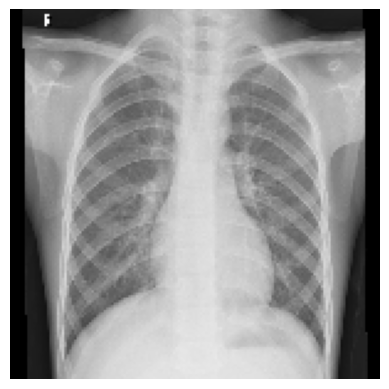

Prediction: Pneumonia (Confidence: 1.00)
1/1 [==============================] - 0s 40ms/step


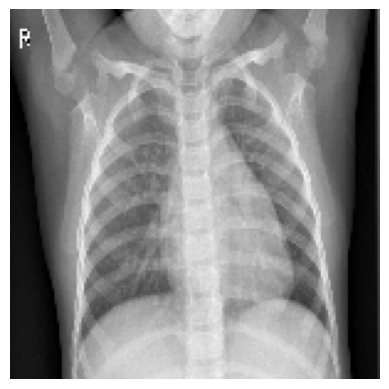

Prediction: Pneumonia (Confidence: 0.92)
1/1 [==============================] - 0s 25ms/step


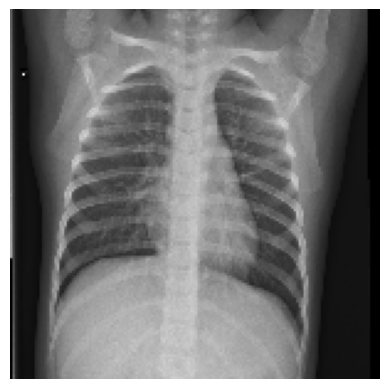

Prediction: Normal (Confidence: 0.88)
1/1 [==============================] - 0s 27ms/step


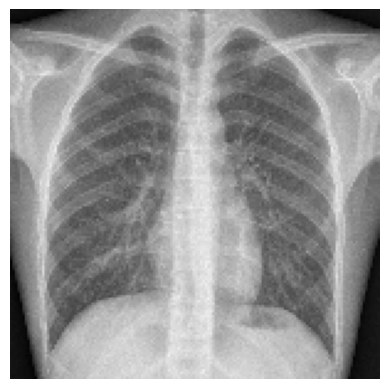

Prediction: Pneumonia (Confidence: 0.60)
1/1 [==============================] - 0s 33ms/step


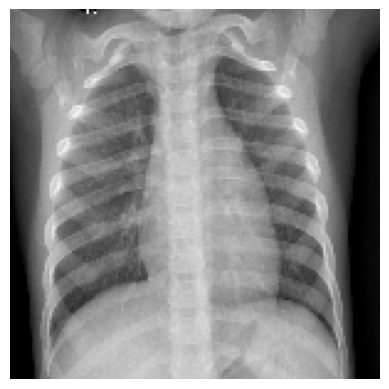

Prediction: Normal (Confidence: 0.84)
1/1 [==============================] - 0s 24ms/step


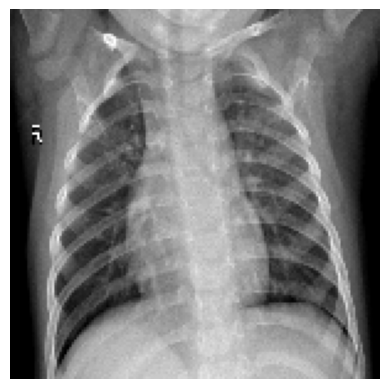

Prediction: Normal (Confidence: 0.72)
1/1 [==============================] - 0s 26ms/step


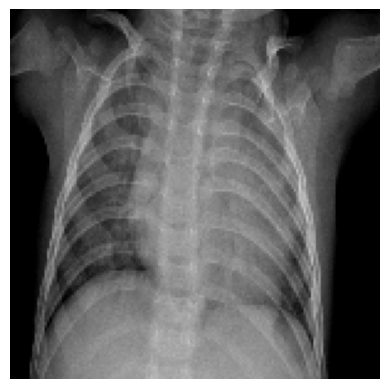

Prediction: Normal (Confidence: 0.50)
1/1 [==============================] - 0s 27ms/step


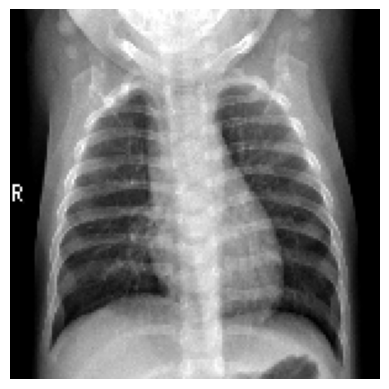

Prediction: Normal (Confidence: 0.96)
1/1 [==============================] - 0s 26ms/step


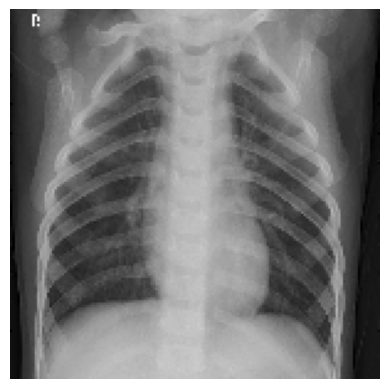

Prediction: Pneumonia (Confidence: 0.67)
1/1 [==============================] - 0s 31ms/step


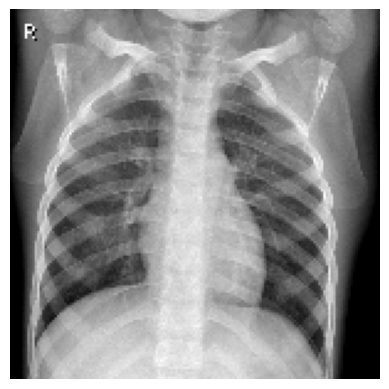

Prediction: Normal (Confidence: 0.82)
1/1 [==============================] - 0s 32ms/step


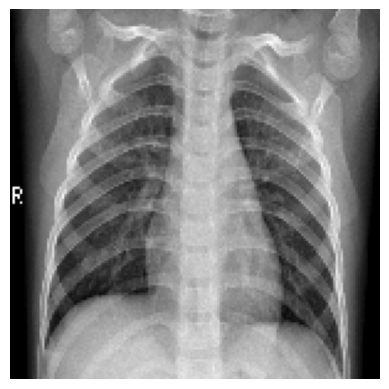

Prediction: Normal (Confidence: 0.99)
1/1 [==============================] - 0s 38ms/step


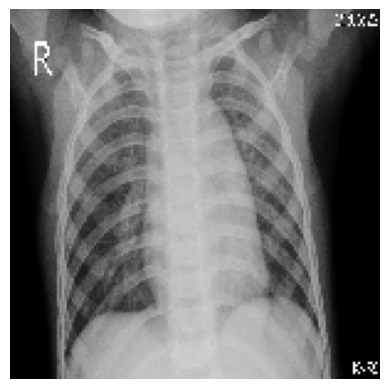

Prediction: Pneumonia (Confidence: 1.00)
1/1 [==============================] - 0s 34ms/step


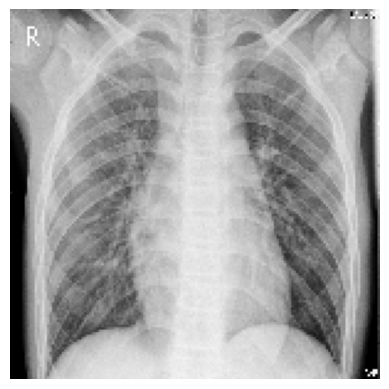

Prediction: Pneumonia (Confidence: 0.99)
1/1 [==============================] - 0s 40ms/step


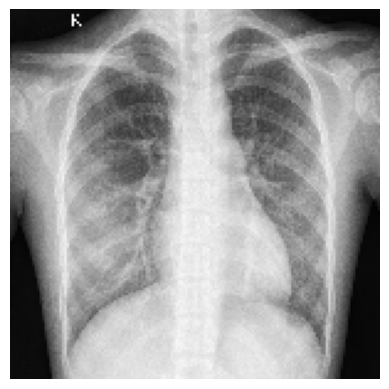

Prediction: Normal (Confidence: 0.50)
1/1 [==============================] - 0s 47ms/step


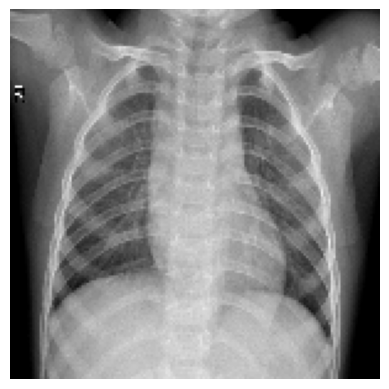

Prediction: Normal (Confidence: 0.92)
1/1 [==============================] - 0s 50ms/step


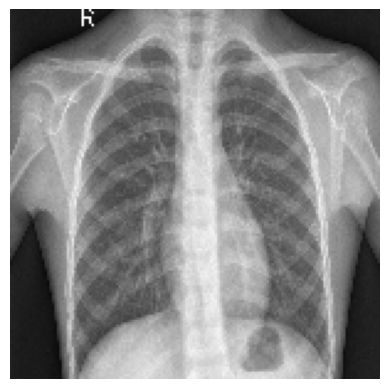

Prediction: Normal (Confidence: 0.90)
1/1 [==============================] - 0s 33ms/step


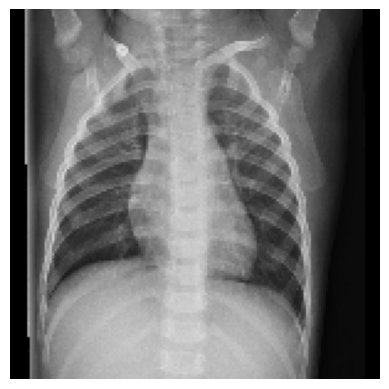

Prediction: Normal (Confidence: 0.71)
1/1 [==============================] - 0s 60ms/step


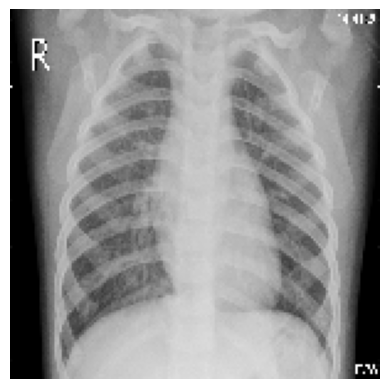

Prediction: Pneumonia (Confidence: 1.00)
1/1 [==============================] - 0s 32ms/step


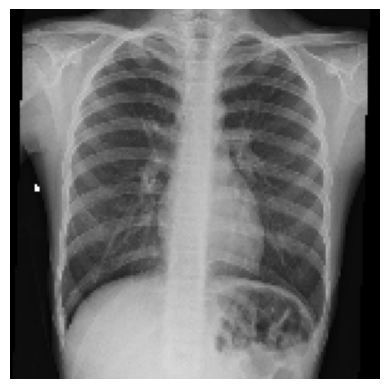

Prediction: Normal (Confidence: 0.76)


In [46]:
for img_path in normal_images:
    #Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    #Make predictions
    prediction = model.predict(img_array)

    #Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    #Display the prediction result
    if prediction[0] > 0.5:
        print(f"Prediction: Pneumonia (Confidence: {prediction[0][0]:.2f})")
    else:
        print(f"Prediction: Normal (Confidence: {1 - prediction[0][0]:.2f})")
